In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import shuffle
from scipy import stats

In [2]:
data = pd.read_csv('/Users/_fangkhai/Documents/Computer Science Semester 5/Introduction to Data Science/Assignment Dataset/INFY Historical Data (2009-2019).csv').fillna(0)
data.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date")
data = data[data["Date"].between('2017-12-31', '2019-12-31')]

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-12-31,731.15,729.70,737.75,725.45,6.93M,-0.24%
1,2019-12-30,732.90,736.10,737.95,727.25,5.37M,-0.55%
2,2019-12-27,736.95,729.75,737.50,728.85,3.40M,1.10%
3,2019-12-26,728.95,732.00,734.55,726.55,3.82M,-0.61%
4,2019-12-24,733.40,736.95,736.95,728.30,2.89M,-0.35%


In [5]:
data.set_index("Date")

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93M,-0.24%
2019-12-30,732.90,736.10,737.95,727.25,5.37M,-0.55%
2019-12-27,736.95,729.75,737.50,728.85,3.40M,1.10%
2019-12-26,728.95,732.00,734.55,726.55,3.82M,-0.61%
2019-12-24,733.40,736.95,736.95,728.30,2.89M,-0.35%
...,...,...,...,...,...,...
2018-01-05,502.03,503.67,509.17,499.05,11.03M,-0.34%
2018-01-04,503.72,506.50,506.50,500.84,8.95M,-0.58%
2018-01-03,506.64,510.22,511.75,505.31,6.85M,-0.82%


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 490
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      491 non-null    datetime64[ns]
 1   Price     491 non-null    float64       
 2   Open      491 non-null    float64       
 3   High      491 non-null    float64       
 4   Low       491 non-null    float64       
 5   Vol.      491 non-null    object        
 6   Change %  491 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 30.7+ KB


In [7]:
data["Vol."] = data["Vol."].str.replace("M", "")
data["Change %"] = data["Change %"].str.replace("%", "")

In [8]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

In [9]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        2
Change %    0
dtype: int64

In [10]:
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object

In [11]:
data = data.fillna(data["Vol."].mean())

In [12]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [13]:
data.set_index("Date", inplace = True)

In [14]:
z = np.abs(stats.zscore(data))
z

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,0.602882,0.582606,0.591637,0.626862,0.319757,0.198235
2019-12-30,0.626150,0.667497,0.594281,0.650924,0.562327,0.387755
2019-12-27,0.679999,0.583269,0.588332,0.672313,0.868649,0.620978
2019-12-26,0.573630,0.613114,0.549328,0.641566,0.803342,0.424436
2019-12-24,0.632798,0.678772,0.581060,0.664960,0.947951,0.265484
...,...,...,...,...,...,...
2018-01-05,2.443508,2.415529,2.430565,2.399629,0.317766,0.259371
2018-01-04,2.421038,2.377991,2.465866,2.375700,0.005660,0.406096
2018-01-03,2.382213,2.328648,2.396453,2.315946,0.332196,0.552821


In [15]:
(np.abs(stats.zscore(data)) > 3).sum()

Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    3
dtype: int64

In [16]:
data_clean = data[((np.abs(stats.zscore(data)))<3).all(axis=1)]
data_clean

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93,-0.24
2019-12-30,732.90,736.10,737.95,727.25,5.37,-0.55
2019-12-27,736.95,729.75,737.50,728.85,3.40,1.10
2019-12-26,728.95,732.00,734.55,726.55,3.82,-0.61
2019-12-24,733.40,736.95,736.95,728.30,2.89,-0.35
...,...,...,...,...,...,...
2018-01-05,502.03,503.67,509.17,499.05,11.03,-0.34
2018-01-04,503.72,506.50,506.50,500.84,8.95,-0.58
2018-01-03,506.64,510.22,511.75,505.31,6.85,-0.82


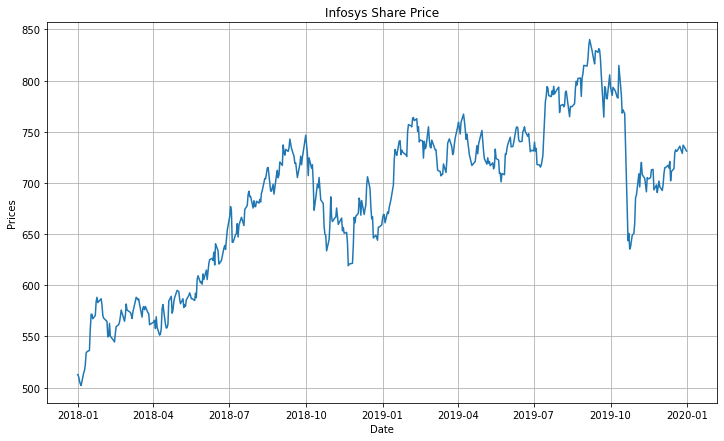

In [17]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.plot(data["Price"])
plt.title("Infosys Share Price")
plt.show()

<AxesSubplot:ylabel='Density'>

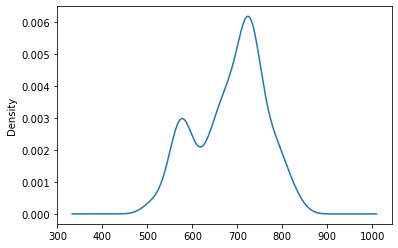

In [18]:
df = data["Price"]
df.plot(kind = "kde")

### SelectKBest

In [19]:
open_price_crosstab = pd.crosstab(data["Open"], data["Price"], margins = True)
open_price_crosstab

Price,502.03,503.72,506.64,510.81,512.72,513.96,516.59,522.0,533.68,535.0,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Open,,,,,,,,,,,,,,,,,,,,,
503.67,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
506.5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
508.43,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
510.22,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
514.56,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
832.05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
836.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
high_price_crosstab = pd.crosstab(data["High"], data["Price"], margins = True)
high_price_crosstab

Price,502.03,503.72,506.64,510.81,512.72,513.96,516.59,522.0,533.68,535.0,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
High,,,,,,,,,,,,,,,,,,,,,
506.5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
509.17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
511.75,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
515.43,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
516.91,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
837.95,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
840.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
low_price_crosstab = pd.crosstab(data["Low"], data["Price"], margins = True)
low_price_crosstab

Price,502.03,503.72,506.64,510.81,512.72,513.96,516.59,522.0,533.68,535.0,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Low,,,,,,,,,,,,,,,,,,,,,
499.05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
500.84,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
505.31,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
506.02,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
507.49,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
826.65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
827.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
vol_price_crosstab = pd.crosstab(data["Vol."], data["Price"], margins = True)
vol_price_crosstab

Price,502.03,503.72,506.64,510.81,512.72,513.96,516.59,522.0,533.68,535.0,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Vol.,,,,,,,,,,,,,,,,,,,,,
2.89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31.57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35.34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60.52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
change_price_crosstab = pd.crosstab(data["Change %"], data["Price"], margins = True)
change_price_crosstab

Price,502.03,503.72,506.64,510.81,512.72,513.96,516.59,522.0,533.68,535.0,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Change %,,,,,,,,,,,,,,,,,,,,,
-16.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-5.05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-3.87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-3.52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
shuffled_data = shuffle(data, random_state = 100)

#X = Independent Variable
target_col = "Price"
X = data.drop("Price", axis = 1)

#y = Dependent Variable
y = shuffled_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(343, 5) (148, 5) (343,) (148,)


In [25]:
X_n = SelectKBest(f_classif, k = 1).fit_transform(X, y)
X_n.shape

#Another method (Giving Same Results)

X_new = SelectKBest(f_classif, k = 1).fit(X_train, y_train)
X_train.columns[X_new.get_support()]

Index(['Open'], dtype='object')

In [26]:
pd.crosstab(np.squeeze(X_n), np.squeeze(y))

Price,502.03,503.72,506.64,510.81,512.72,513.96,516.59,522.00,533.68,535.00,...,820.10,820.70,821.30,827.70,829.10,829.30,829.85,831.25,834.05,840.15
row_0,,,,,,,,,,,,,,,,,,,,,
503.67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506.50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508.43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510.22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514.56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
831.50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832.05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data = data.groupby("Date").sum()

In [28]:
data = data.resample(rule = 'MS').sum()

In [29]:
data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-01,12025.01,11963.98,12140.21,11865.81,264.68,10.11
2018-02-01,10677.18,10643.48,10799.79,10550.91,181.42,2.08
2018-03-01,10956.20,10977.79,11064.56,10871.13,150.67,-3.45
2018-04-01,11964.73,11913.95,12091.45,11797.04,238.89,6.15
2018-05-01,13018.45,13020.16,13138.61,12898.99,152.66,2.79
2018-06-01,13161.60,13136.91,13280.96,13032.68,148.90,6.92
2018-07-01,14681.05,14705.58,14880.93,14496.36,222.75,4.59
2018-08-01,14628.47,14624.96,14744.72,14503.14,153.23,5.60
2018-09-01,13073.12,13120.10,13257.95,12945.95,151.53,1.43


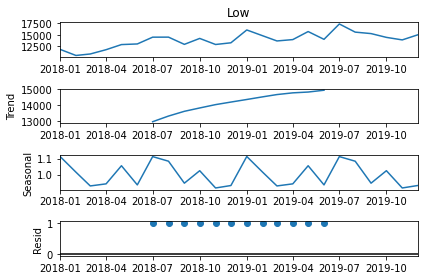

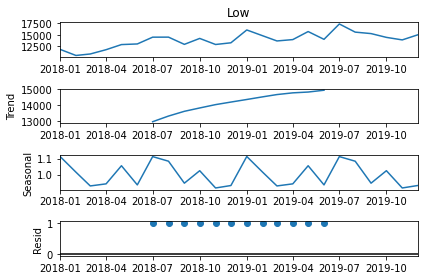

In [30]:
result = seasonal_decompose(data["Low"], model = "multiplicable", period = 12)
result.plot()

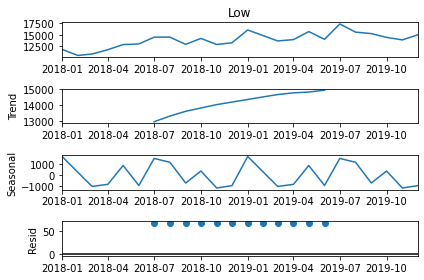

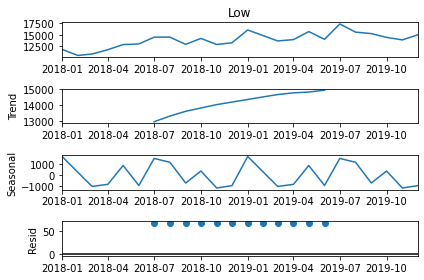

In [31]:
result = seasonal_decompose(data["Low"], model = "additive", period = 12)
result.plot()

In [32]:
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [33]:
model = ExponentialSmoothing(train["Low"], trend = "add", seasonal = "add", seasonal_periods = 4).fit()

In [34]:
test_pred = model.forecast(8)

In [35]:
test_pred

2019-05-01    15391.367710
2019-06-01    15433.373274
2019-07-01    15231.061786
2019-08-01    15518.158081
2019-09-01    16201.016708
2019-10-01    16243.022271
2019-11-01    16040.710783
2019-12-01    16327.807078
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Date'>

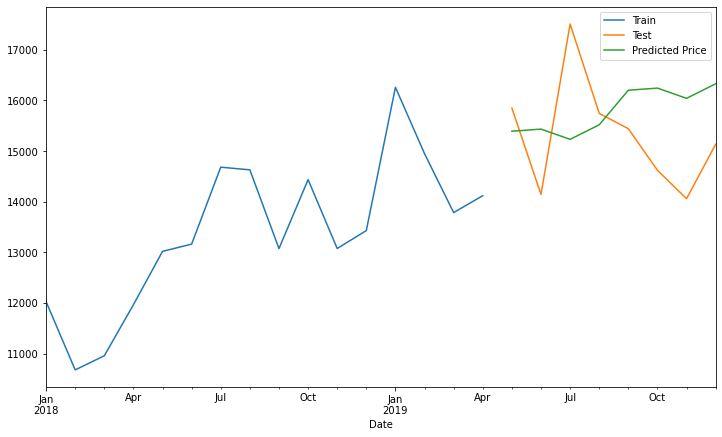

In [36]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [37]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

8.058564286425598

In [38]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

1226.380317095024

In [39]:
mse = mean_squared_error(test["Price"], test_pred)
mse

1960469.1109908004

In [40]:
rmse = math.sqrt(mse)
rmse

1400.1675296159387

In [41]:
model = ExponentialSmoothing(train["Low"], trend = "mul", seasonal = "mul", seasonal_periods = 4).fit()

/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [42]:
test_pred = model.forecast(8)

In [43]:
test_pred

2019-05-01    15684.350787
2019-06-01    15763.514174
2019-07-01    15502.102691
2019-08-01    15882.063029
2019-09-01    16667.621588
2019-10-01    16751.747823
2019-11-01    16473.948140
2019-12-01    16877.728648
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Date'>

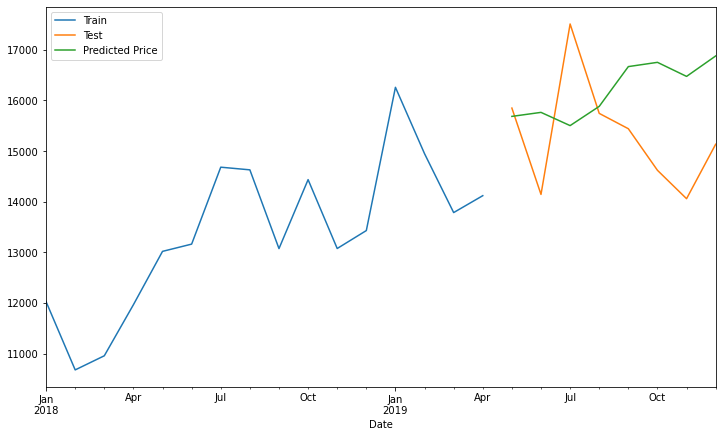

In [44]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [45]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

9.5086842293806

In [46]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

1431.058740541518

In [47]:
mse = mean_squared_error(test["Price"], test_pred)
mse

2703504.3604473514

In [48]:
rmse = math.sqrt(mse)
rmse

1644.2336696611437